In [4]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from epiweeks import Week 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from mosqlient.models.score import Scorer

sys.path.append('../')
from utils import load_preds, dates_23, dates_24

# Definir a cor das bordas (spines) como cinza
mpl.rcParams['axes.edgecolor'] = 'gray'

# Definir a cor das linhas dos ticks maiores e menores como cinza
mpl.rcParams['xtick.color'] = 'gray'
mpl.rcParams['ytick.color'] = 'gray'
mpl.rcParams['xtick.labelcolor'] = 'black'
mpl.rcParams['ytick.labelcolor'] = 'black'
plt.rcParams['axes.labelsize'] = 14  # Axis labels
plt.rcParams['xtick.labelsize'] = 12  # X-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Y-axis tick labels
plt.rcParams['font.size'] = 14  # General font size

In [5]:
UNIQUE_MODELS = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'E1', 'E2']

In [6]:
df_preds, models_by_state, data_all = load_preds(exclude = False)

df_ens_base = pd.read_csv(f'../predictions/ensemble_2023_2024_E1_mandatory.csv')
df_ens_base['model_id'] = 'E1'
df_ens_base.date = pd.to_datetime(df_ens_base.date)
df_preds = pd.concat([df_preds, df_ens_base], ignore_index = True)
df_preds['model_id'] = df_preds['model_id'].replace({'ln_crps': 'E2'})
df_preds = df_preds.loc[df_preds.model_id.isin(UNIQUE_MODELS)]
df_preds.head()

,date,pred,lower,upper,state,model_id
0,2022-10-09,110.690113,64.291013,219.826948,AC,M1
1,2025-08-10,192.641953,142.814506,261.828157,PR,M1
2,2025-08-17,171.137457,119.943438,233.918928,PR,M1
3,2025-08-24,196.875395,132.696765,267.461459,PR,M1
4,2025-08-31,179.610112,136.303073,247.230651,PR,M1


In [7]:
states = ['AM', 'CE', 'GO', 'MG', 'PR']
models = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']
#models = ['E1', 'E2']
flag = 'models'

In [8]:
def get_scorer(state, model, df_preds, data_all, year):

    if year == 2023:
        dates_ = dates_23
        start = Week(2022, 41).startdate().strftime('%Y-%m-%d')
        end = Week(2023, 14).startdate().strftime('%Y-%m-%d')

    if year == 2024:
        dates_ = dates_24
        start = Week(2023, 41).startdate().strftime('%Y-%m-%d')
        end = Week(2024, 14).startdate().strftime('%Y-%m-%d')
        
    metrics = {}

    metrics_6 = {}
    
    df_preds_ = df_preds.loc[df_preds.date.isin(dates_)]
    p1 = df_preds_.loc[(df_preds_.state == state) & (df_preds_.model_id == model)][['date', 'lower', 'pred', 'upper']]

    data_all_ = data_all.loc[data_all.date.isin(dates_)]
    d1 = data_all_.loc[data_all_.uf == state][['date','casos']]

    score = Scorer(df_true =d1, pred = p1)

    metrics['crps'] = score.crps[1]['pred']
    metrics['log_score'] = score.log_score[1]['pred']
    metrics['interval_score'] = score.interval_score[1]['pred']

    score.set_date_range(start_date = start,
                         end_date = end)

    metrics_6['crps'] = score.crps[1]['pred']
    metrics_6['log_score'] = score.log_score[1]['pred']
    metrics_6['interval_score'] = score.interval_score[1]['pred']

    df1 = pd.DataFrame([metrics])
    
    df1['state'] = state
    df1['model'] = model

    df2 = pd.DataFrame([metrics_6])

    df2.columns = df2.columns + '_6'

    return pd.concat([df1, df2], axis=1 )
    

In [9]:
%%time 
df_metrics_23 = pd.DataFrame()
df_metrics_24 = pd.DataFrame()

for s in states:
    for m in models: 

        df_metrics_23 = pd.concat([df_metrics_23, get_scorer(s, m, df_preds, data_all, 2023)], ignore_index = True)
        df_metrics_24 = pd.concat([df_metrics_24, get_scorer(s, m, df_preds, data_all, 2024)], ignore_index = True)

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/

CPU times: user 359 ms, sys: 6.52 ms, total: 365 ms
Wall time: 382 ms


/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/

In [10]:
df_23 = df_metrics_23.pivot(columns = 'state', index = 'model', values = 'crps')

df_23.head()

state,AM,CE,GO,MG,PR
model,,,,,
M1,41.326270,354.468803,836.628849,2027.001074,1973.490357
M2,50.125451,440.363682,1087.168837,4080.108557,3041.911787
M3,62.978635,428.946384,1579.225895,3543.444059,2422.129628
M4,112.217983,490.371499,847.612827,2116.880158,2096.264984
M5,54.999053,407.380018,2595.078958,2602.189041,3167.338261


In [11]:
df_24 = df_metrics_24.pivot(columns = 'state', index = 'model', values = 'crps')

df_24.head()

state,AM,CE,GO,MG,PR
model,,,,,
M1,95.642694,120.644682,6352.777472,23378.940924,13124.469280
M2,103.143626,325.200686,3520.763066,32464.696975,5257.265964
M3,119.618992,292.648137,4993.631457,33518.869750,11407.231344
M4,109.614579,500.167492,5571.040944,35765.252106,13450.375353
M5,103.786174,102.974236,6249.076406,19880.533177,5343.826619


In [12]:
def plot_heat(ax, df, year, metric, label): 

    df_ = df.pivot(columns = 'state', index = 'model', values = metric)

    if metric == 'log_score':
        palette = 'Reds_r'
    else: 
        palette = 'Reds'

    sns.heatmap(df_, annot=True, fmt='.0f',  cmap=palette, cbar_kws={'label': metric}, ax = ax)

    ax.set_xlabel('State')
    ax.set_ylabel('Model')
    ax.tick_params(axis='y', labelrotation=0)  
    ax.set_title(f'{label} - {year}')
    
        

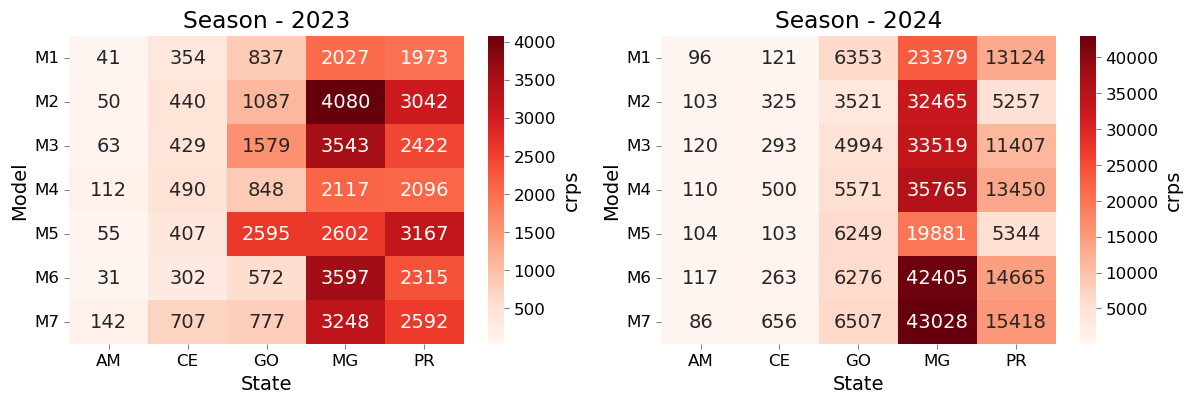

In [13]:
_,ax = plt.subplots(1,2, figsize=(14, 4))

plot_heat(ax[0], df_metrics_23, 2023, metric = 'crps', label = 'Season')
plot_heat(ax[1], df_metrics_24, 2024, metric = 'crps', label = 'Season')

plt.savefig(f'../figures/crps_season_{flag}.pdf', bbox_inches = 'tight')

plt.show()

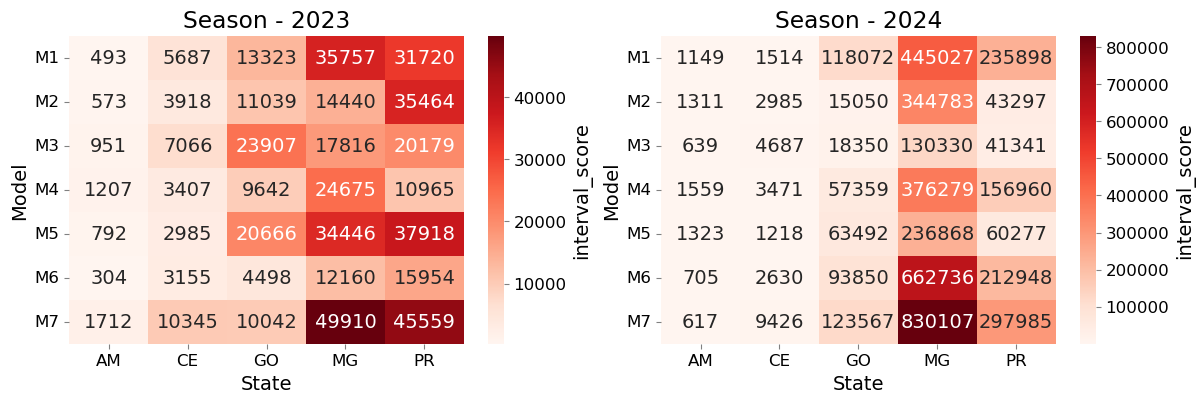

In [14]:
_,ax = plt.subplots(1,2, figsize=(14, 4))

plot_heat(ax[0], df_metrics_23, 2023, metric = 'interval_score', label = 'Season')
plot_heat(ax[1], df_metrics_24, 2024, metric = 'interval_score', label = 'Season')

plt.savefig(f'../figures/interval_score_season_{flag}.pdf', bbox_inches = 'tight')

plt.show()

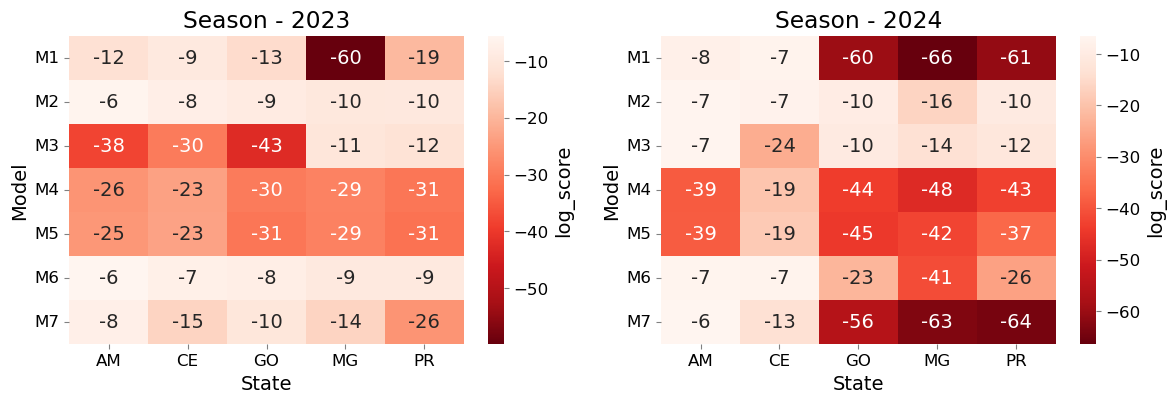

In [15]:
_,ax = plt.subplots(1,2, figsize=(14, 4))

plot_heat(ax[0], df_metrics_23, 2023, metric = 'log_score', label = 'Season')
plot_heat(ax[1], df_metrics_24, 2024, metric = 'log_score', label = 'Season')

plt.savefig(f'../figures/log_score_season_{flag}.pdf', bbox_inches = 'tight')

plt.show()

### Compute scores daily:

In [16]:
data_23 = data_all.loc[(data_all.date >= Week(2022, 41).startdate().strftime('%Y-%m-%d')) & (data_all.date <= Week(2023, 40).startdate().strftime('%Y-%m-%d'))] 
data_24 = data_all.loc[(data_all.date >= Week(2023, 41).startdate().strftime('%Y-%m-%d')) & (data_all.date <= Week(2024, 40).startdate().strftime('%Y-%m-%d'))] 

peak_dates = {'AM':{2023: {}, 2024: {}}, 'CE': {2023: {}, 2024: {}}, 'GO':{2023: {}, 2024: {}}, 'PR':{2023: {}, 2024: {}}, 'MG':{2023: {}, 2024: {}}}

for state in ['AM', 'CE', 'GO', 'PR', 'MG']:
    
    df_23 = data_23.loc[data_23.uf == state]
    
    peak_date = pd.to_datetime(df_23.loc[df_23.casos == df_23['casos'].max()].date.values[0])

    peak_dates[state][2023]['peak_date'] = peak_date

    df_24 = data_24.loc[data_24.uf == state]
    
    peak_date = pd.to_datetime(df_24.loc[df_24.casos == df_24['casos'].max()].date.values[0])

    peak_dates[state][2024]['peak_date'] = peak_date

In [17]:
def get_score_daily(state, model, df_preds, data_all, year):

    if year == 2023:
        dates_ = dates_23
        start = Week(2022, 41).startdate().strftime('%Y-%m-%d')
        end = Week(2023, 14).startdate().strftime('%Y-%m-%d')

    if year == 2024:
        dates_ = dates_24
        start = Week(2023, 41).startdate().strftime('%Y-%m-%d')
        end = Week(2024, 14).startdate().strftime('%Y-%m-%d')
    
    df_preds_ = df_preds.loc[df_preds.date.isin(dates_)]
    p1 = df_preds_.loc[(df_preds_.state == state) & (df_preds_.model_id == model)][['date', 'lower', 'pred', 'upper']]

    data_all_ = data_all.loc[data_all.date.isin(dates_)]
    d1 = data_all_.loc[data_all_.uf == state][['date','casos']]

    score = Scorer(df_true =d1, pred = p1)

    metrics_crps = pd.DataFrame(score.crps[0]['pred'], columns = ['crps'])
    metrics_log = pd.DataFrame(score.log_score[0]['pred'], columns = ['log_score'])
    metrics_int = pd.DataFrame(score.interval_score[0]['pred'], columns = ['interval_score'])

    metrics = pd.concat([metrics_crps, metrics_log, metrics_int], axis = 1)

    score.set_date_range(start_date = start,
                         end_date = end)

    metrics['state'] = state
    metrics['model'] = model

    return metrics

In [18]:
df_dm_23 = pd.DataFrame()
df_dm_24 = pd.DataFrame()

for s in states:
    for m in models: 

        df_dm_23 = pd.concat([df_dm_23, get_score_daily(s, m, df_preds, data_all, 2023)])
        df_dm_24 = pd.concat([df_dm_24, get_score_daily(s, m, df_preds, data_all, 2024)])

/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/homebrew/Caskroom/miniforge/base/envs/lstm_infodengue_sprint/lib/python3.12/site-packages/scoringrules/backend/numpy.py:122: RuntimeWarning: divide by zero encountered in log
  return np.log(x)
/opt/

In [19]:
df_dm_23.head()

,crps,log_score,interval_score,state,model
date,,,,,
2022-10-09,194.734017,-97.949019,3529.195897,AM,M1
2022-10-16,153.883422,-98.633888,2802.648460,AM,M1
2022-10-23,96.673368,-20.351752,1400.898140,AM,M1
2022-10-30,96.040530,-32.452459,1624.904506,AM,M1
2022-11-06,71.543445,-20.309874,1102.074977,AM,M1


In [20]:
UNIQUE_MODELS = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'E1', 'E2']
# Define colors manually, mapping each region to a color from tab10
colors = plt.get_cmap('Set2').colors[:len(UNIQUE_MODELS)]
COLOR_MAP = dict(zip(UNIQUE_MODELS, colors))
colors_  =  plt.get_cmap('tab10').colors
COLOR_MAP['M6'] = plt.get_cmap('Set2').colors[7]
COLOR_MAP['E1'] = colors[5]
COLOR_MAP['E2'] = colors_[3]

In [21]:
COLOR_MAP

{'M1': (0.4, 0.7607843137254902, 0.6470588235294118),
 'M2': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 'M3': (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 'M4': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 'M5': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 'M6': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 'M7': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 'E1': (1.0, 0.8509803921568627, 0.1843137254901961),
 'E2': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}

In [22]:
def plot_metric(ax, state, metric):

    if metric == 'crps':
        label = 'CRPS'
    if metric == 'log_score':
        label = 'Logarithmic score'
    if metric == 'interval_score':
        label = 'Interval score'


    pd = peak_dates[state][2023]['peak_date']
    ax[0].axvline(pd, color = 'black', ls = '--', linewidth = 1.5, label = 'peak date')

    sns.lineplot(ax=ax[0], data = df_dm_23.loc[df_dm_23.state == state].reset_index(), x = 'date', y = metric,
             hue = 'model', palette = COLOR_MAP, linewidth = 1.5, legend = False)

    pd = peak_dates[state][2024]['peak_date']
    ax[1].axvline(pd, color = 'black', ls = '--', linewidth = 1.5, label = 'peak date')

    sns.lineplot(ax=ax[1], data = df_dm_24.loc[df_dm_24.state == state].reset_index(), x = 'date', y = metric,
                 hue = 'model', palette = COLOR_MAP, linewidth = 1.5)
    
    ax[1].legend(title = 'Model')

    ax[0].set_title(f'{label} - {state} - 2023')

    ax[1].set_title(f'{label} - {state} - 2024')

    for ax_ in ax: 
        ax_.grid()
        ax_.set_ylabel(label)



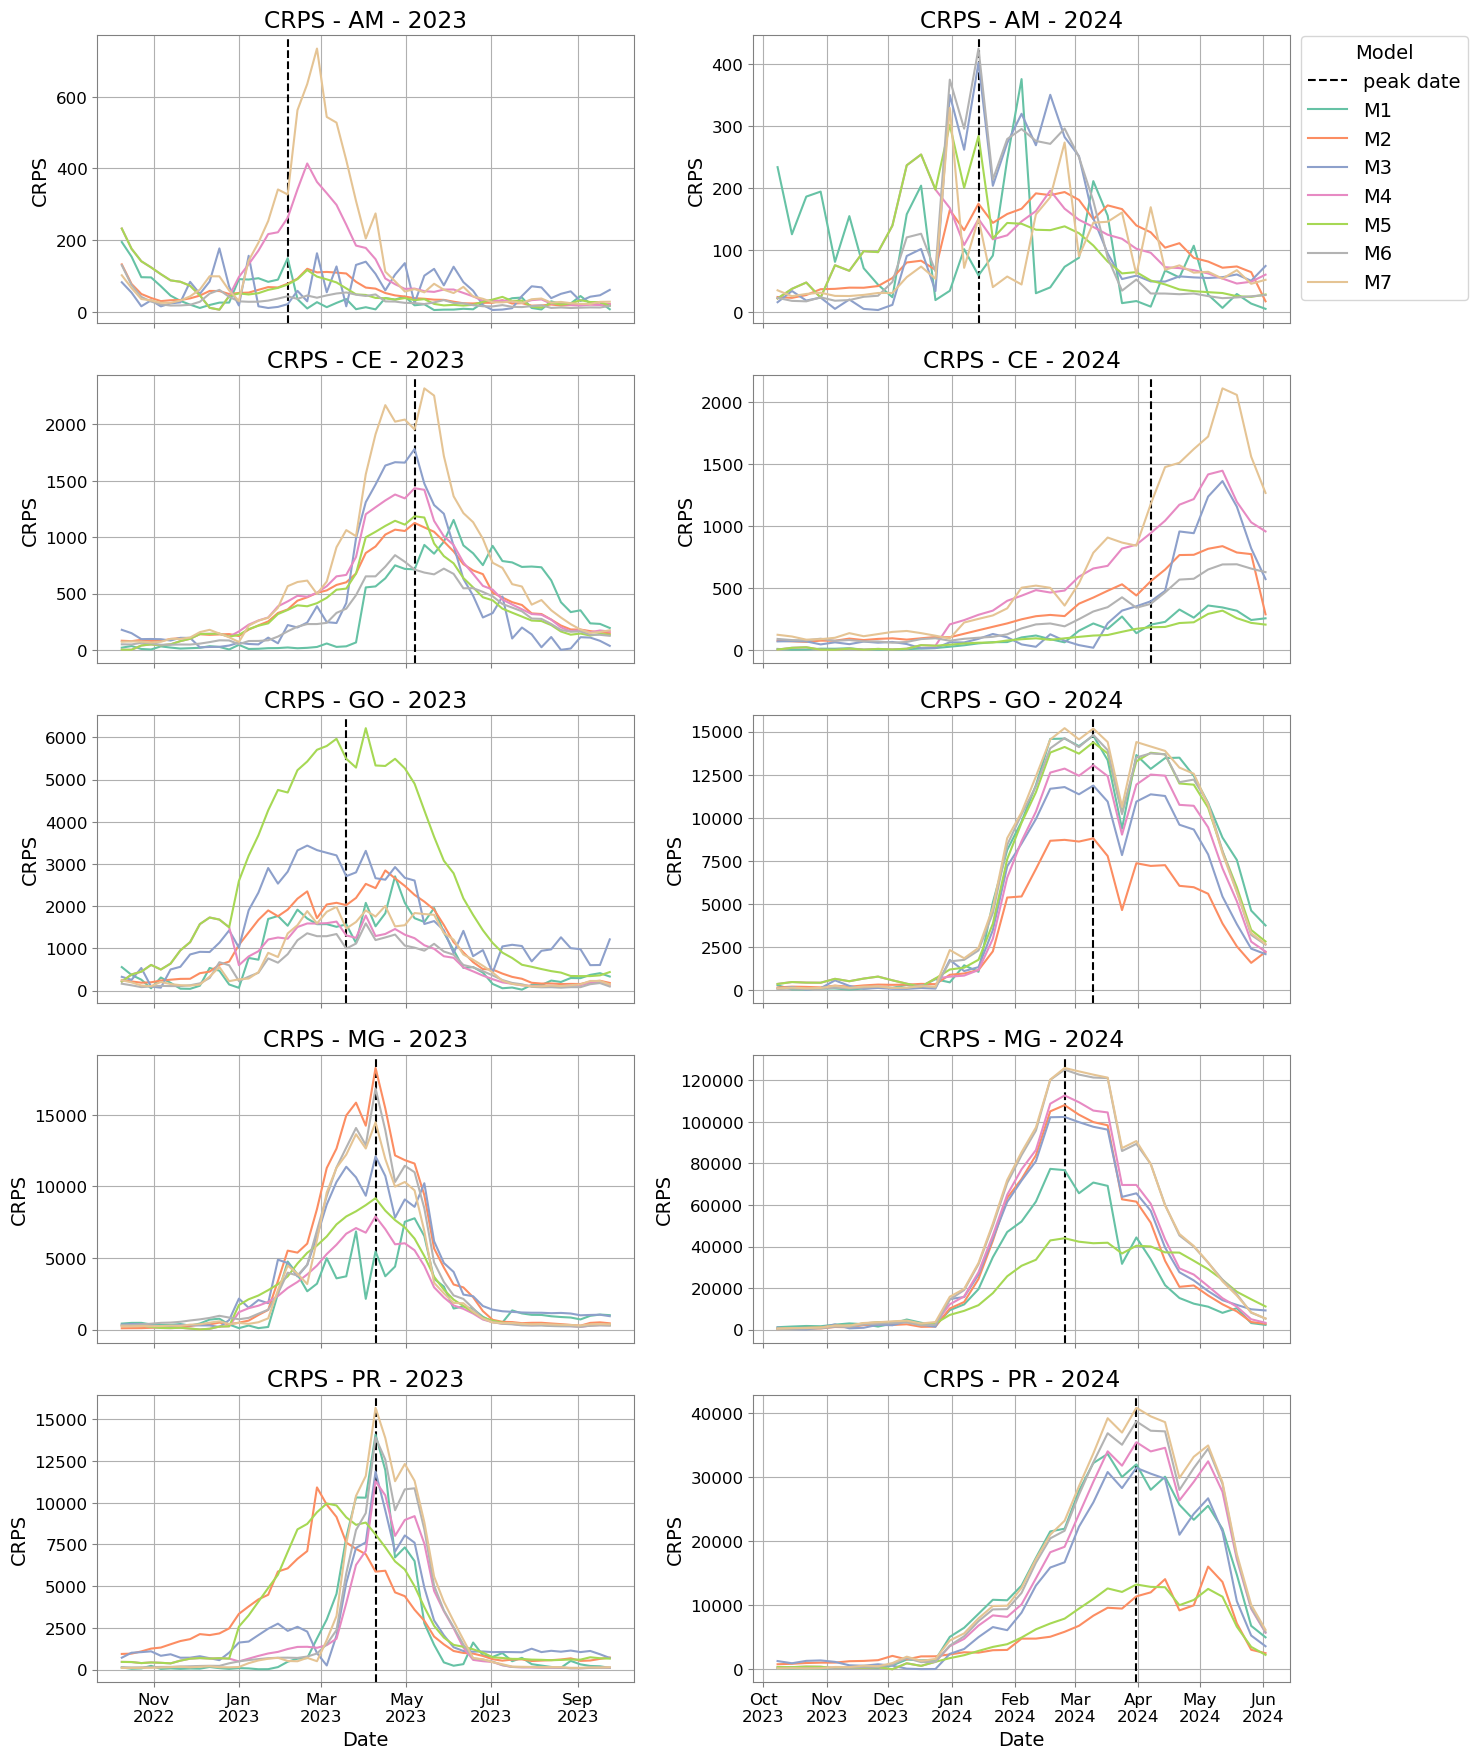

In [23]:
_,ax = plt.subplots(5,2, figsize = (15,18))

metric = 'crps'
plot_metric([ax[0,0], ax[0,1]], 'AM', metric)
plot_metric([ax[1,0], ax[1,1]], 'CE', metric)
plot_metric([ax[2,0], ax[2,1]], 'GO', metric)
plot_metric([ax[3,0], ax[3,1]], 'MG', metric)
plot_metric([ax[4,0], ax[4,1]], 'PR', metric)

for ax_ in ax.ravel()[:-2]:
    ax_.set_xticklabels([])
    ax_.set_xlabel('')

for ax_ in [ax[1,1], ax[2,1], ax[3,1], ax[4,1]]:
    ax_.get_legend().remove() 
    
for ax_ in [ax[4,0], ax[4,1]]: 
    ax_.set_xlabel('Date')
    ax_.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax[0,1].legend(title = 'Model', loc = (1.02, 0.08))

plt.savefig(f'../figures/curve_{metric}_{flag}.pdf', dpi = 450, bbox_inches = 'tight')

#plt.subplots_adjust(wspace = -0.25, hspace = -0.25)

plt.tight_layout()
plt.show()

In [24]:
def plot_metric_all_state(metric):
    
    _,ax = plt.subplots(5,2, figsize = (15,18))
    
    plot_metric([ax[0,0], ax[0,1]], 'AM', metric)
    plot_metric([ax[1,0], ax[1,1]], 'CE', metric)
    plot_metric([ax[2,0], ax[2,1]], 'GO', metric)
    plot_metric([ax[3,0], ax[3,1]], 'MG', metric)
    plot_metric([ax[4,0], ax[4,1]], 'PR', metric)
    
    for ax_ in ax.ravel()[:-2]:
        ax_.set_xticklabels([])
        ax_.set_xlabel('')
    
    for ax_ in [ax[1,1], ax[2,1], ax[3,1], ax[4,1]]:
        ax_.get_legend().remove() 
        
    for ax_ in [ax[4,0], ax[4,1]]: 
        ax_.set_xlabel('Date')
        ax_.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
    

    ax[0,1].legend(title = 'Model', loc = (1.02, 0.08))

    plt.tight_layout()
    
    plt.savefig(f'../figures/curve_{metric}_{flag}.pdf', dpi = 450, bbox_inches = 'tight')
    
    plt.show()

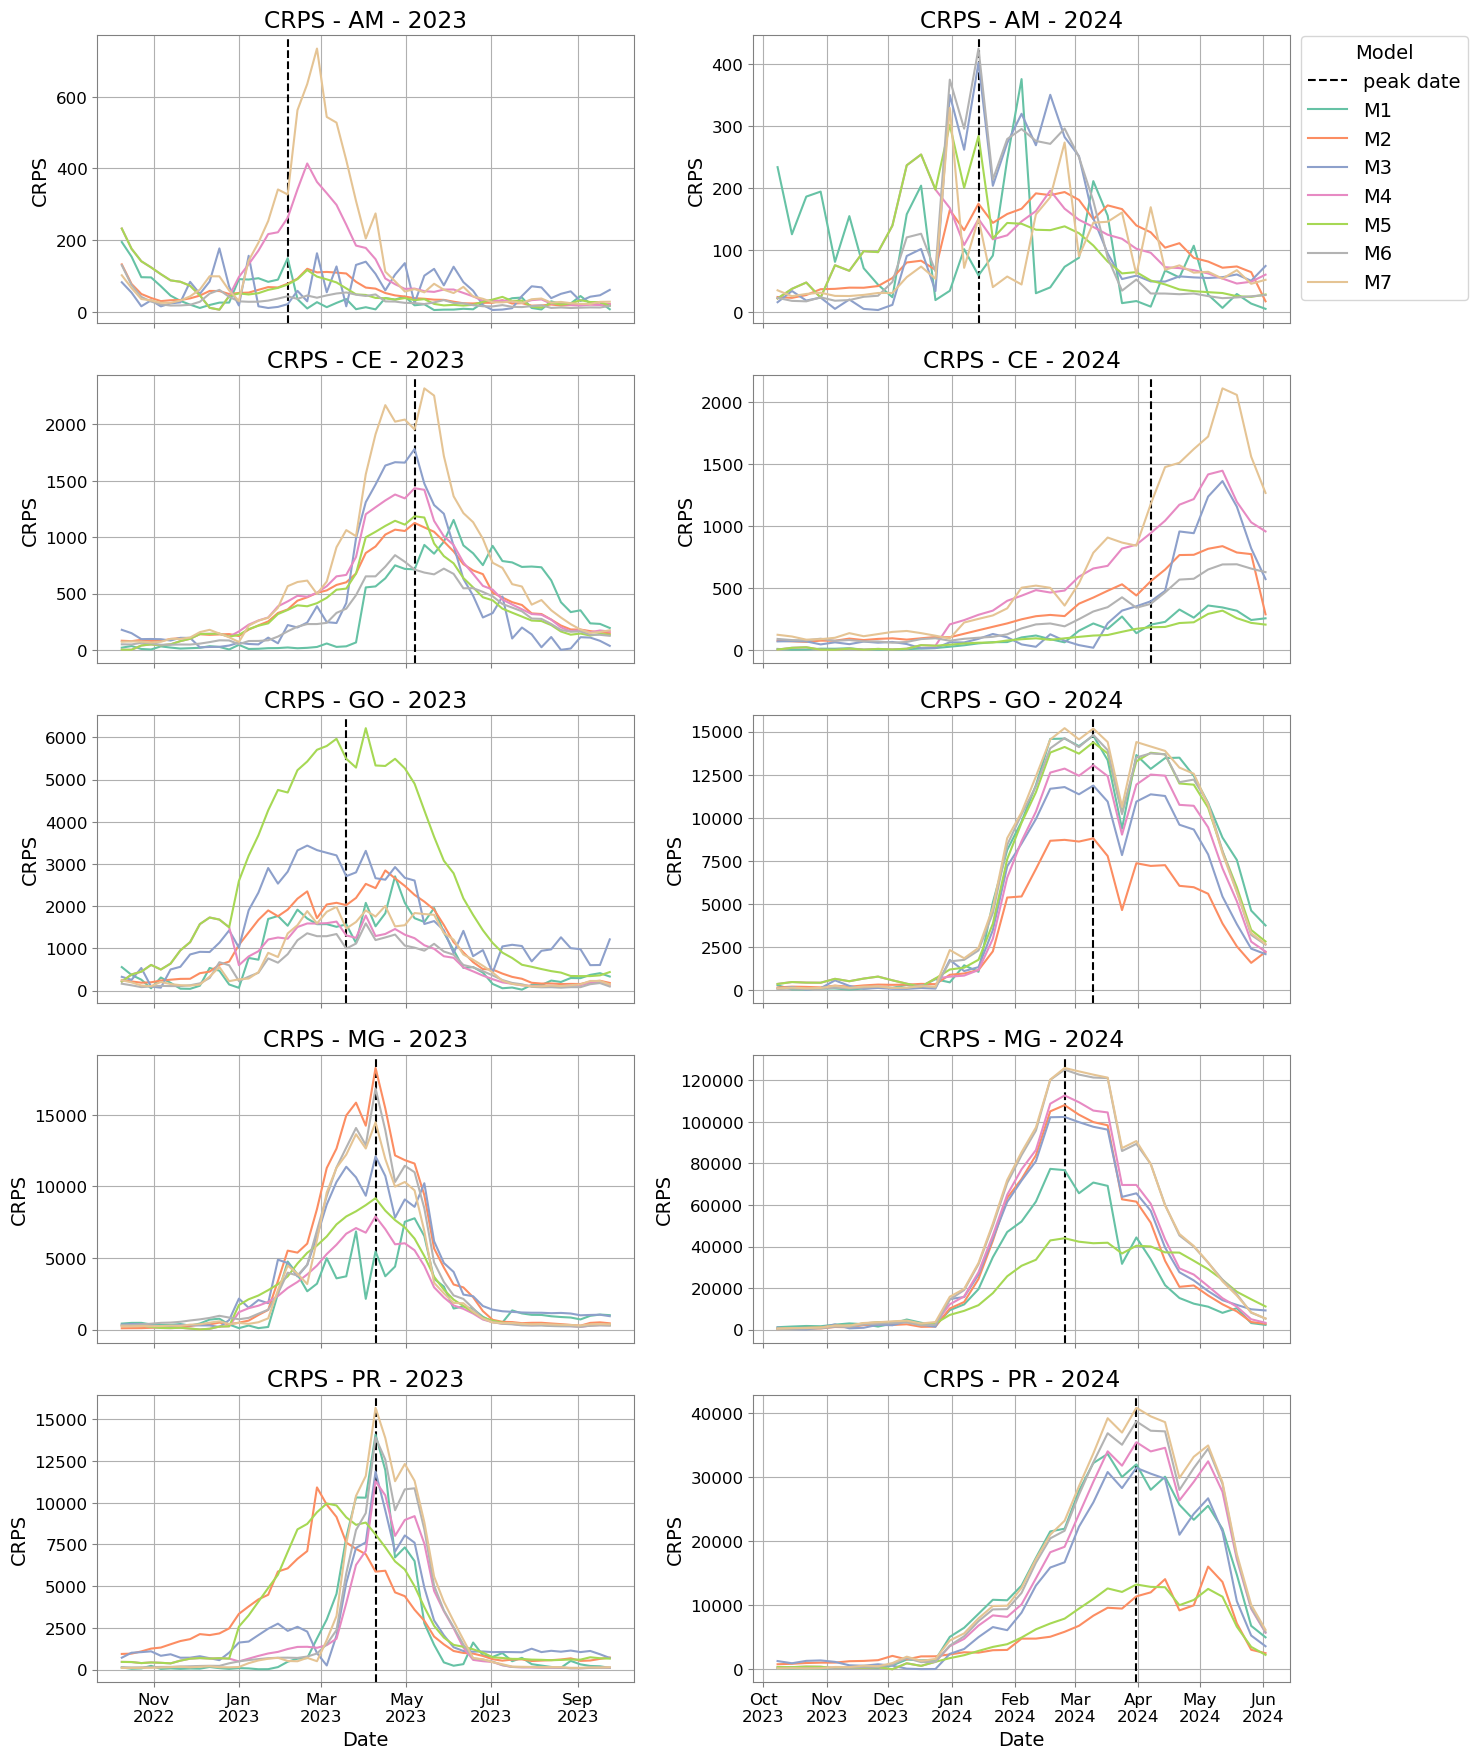

In [25]:
plot_metric_all_state('crps')

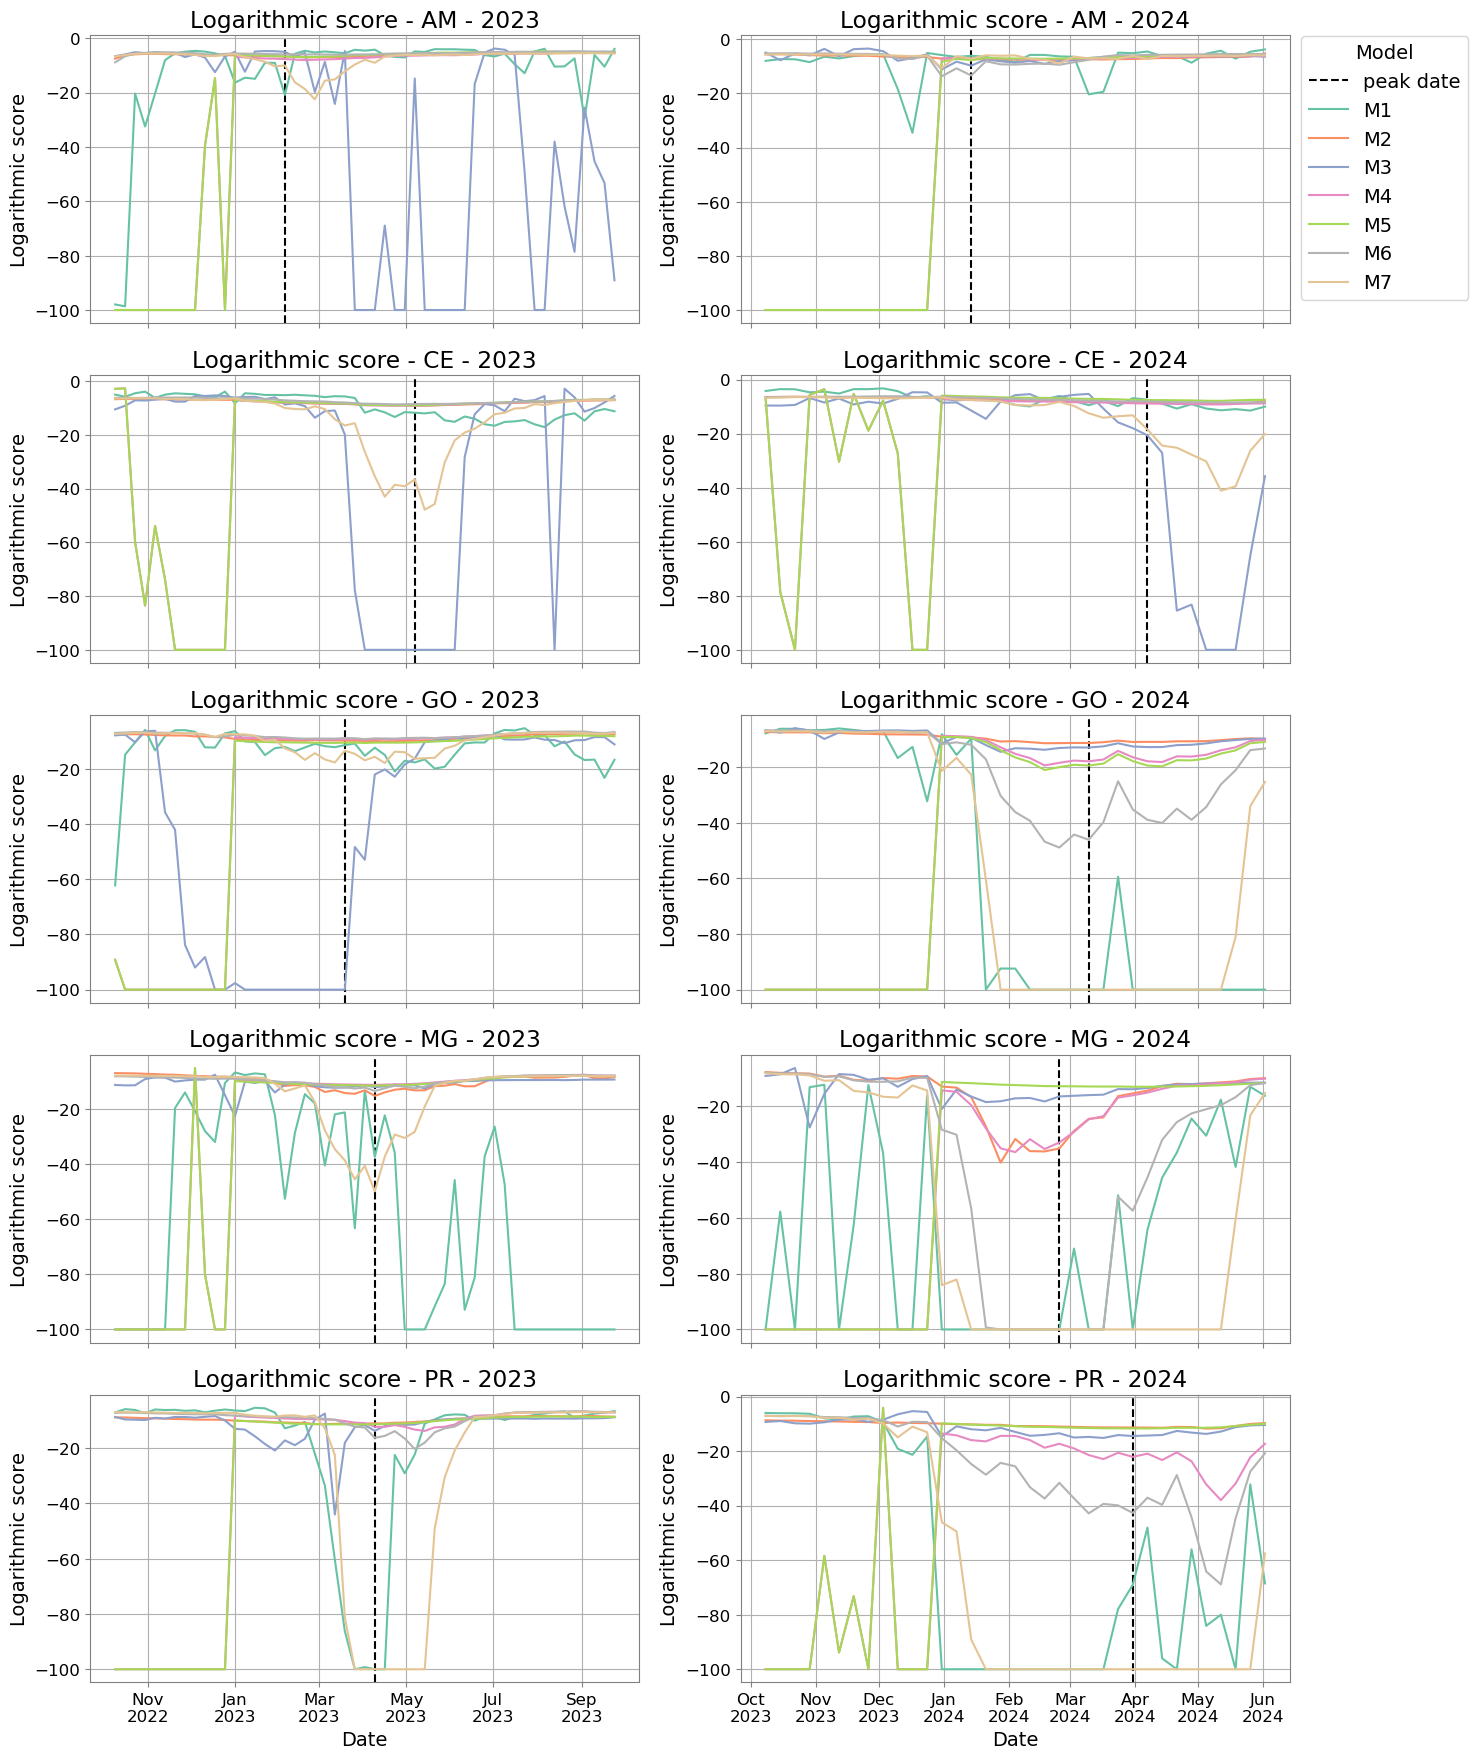

In [26]:
plot_metric_all_state('log_score')

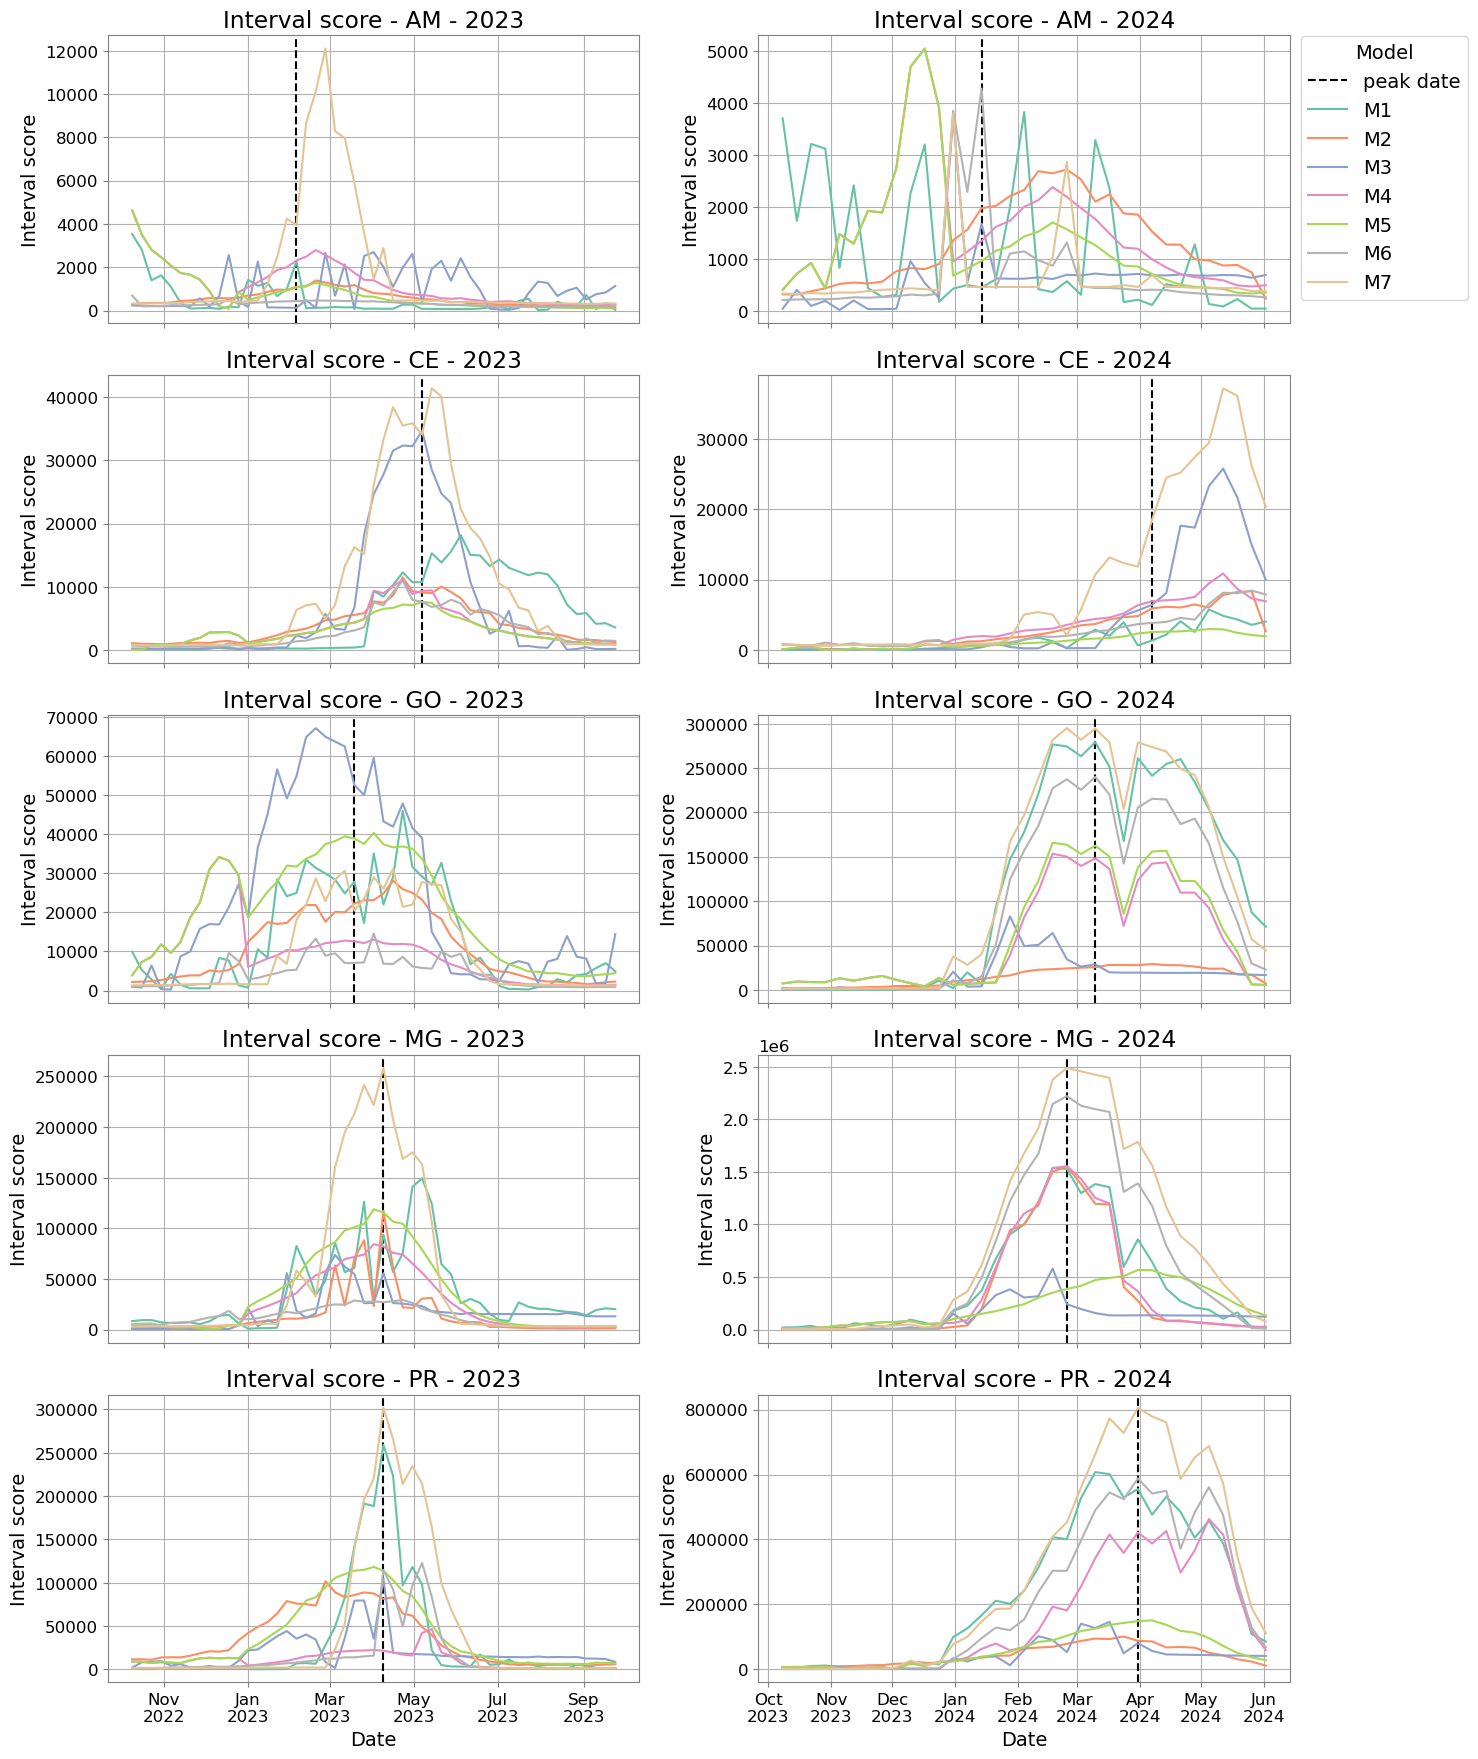

In [27]:
plot_metric_all_state('interval_score')